In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Challenge: Preparing a Dataset for Modeling

<i>Unit 2.1 Project 8</i>

<b>Assignment:</b> Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.


<b>Data Set Selected:</b> <a href = 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'>120 Years of Olympic History: Athletes and Results</a> from Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<b>Categorical</b>
- Name
- Sex
- Team
- NOC
- Games
- Season
- City
- Sport
- Event


<b>Continuous</b>
- ID
- Age
- Height
- Weight
- Year


<b>Outcome</b>
- Medal



In [6]:
df.Height.dropna()

df['Height_M'] = df['Height']*.01

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_M
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1.80
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1.70
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,1.85


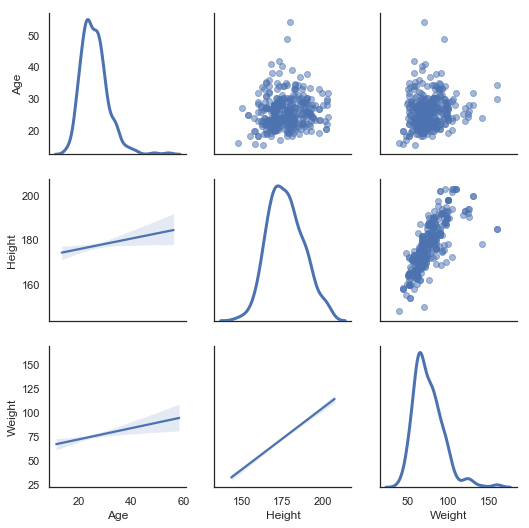

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

df['Gender'] = np.where((df['Sex'].isin(['M'])), 1, 0)

#(df['NOC'] == 'CHN') | (df['NOC'] == 'NED')) &

gold_info = df.loc[
    (df['Medal'] == 'Gold'),
    [ 'Team', 'Age', 'Height', 'Weight', 'Year', 'Sport']
]

df_jittered = gold_info.loc[:, 'Age':'Weight'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns = df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                ID       Age    Height    Weight      Year  Height_M    Gender
ID        1.000000 -0.003631 -0.011141 -0.009176  0.011885 -0.011141 -0.026945
Age      -0.003631  1.000000  0.138246  0.212069 -0.115137  0.138246  0.179324
Height   -0.011141  0.138246  1.000000  0.796213  0.047578  1.000000  0.488424
Weight   -0.009176  0.212069  0.796213  1.000000  0.019095  0.796213  0.511433
Year      0.011885 -0.115137  0.047578  0.019095  1.000000  0.047578 -0.289882
Height_M -0.011141  0.138246  1.000000  0.796213  0.047578  1.000000  0.488424
Gender   -0.026945  0.179324  0.488424  0.511433 -0.289882  0.488424  1.000000


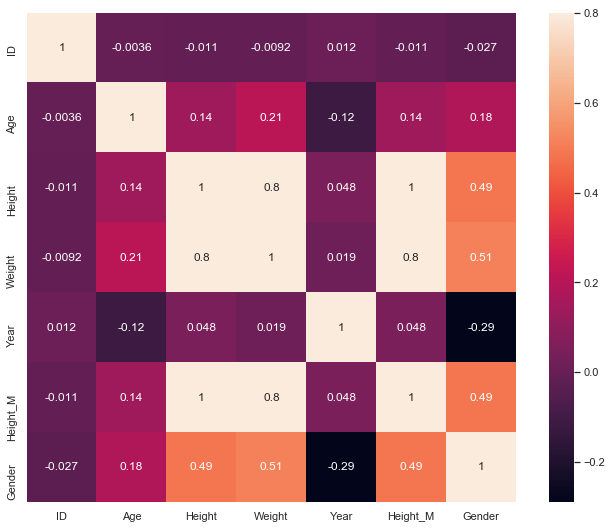

In [10]:
# Make the completely correlation of the df.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

             Age    Height    Weight      Year
Age     1.000000  0.098969  0.176790 -0.095737
Height  0.098969  1.000000  0.809500  0.034419
Weight  0.176790  0.809500  1.000000  0.004202
Year   -0.095737  0.034419  0.004202  1.000000


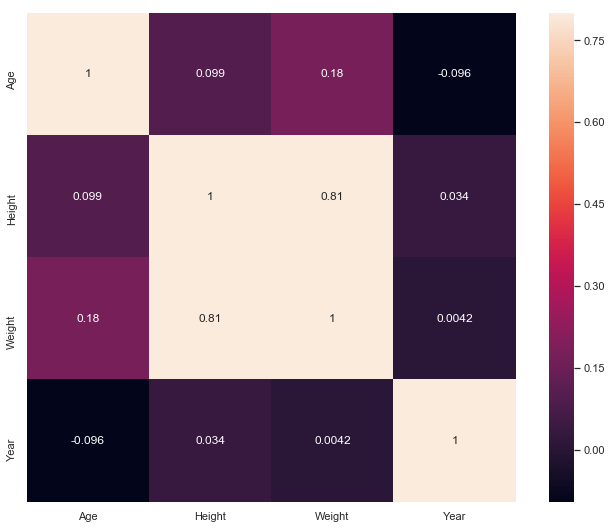

In [11]:
# Make the correlation matrix looking at who won a gold medal.
corrmat2 = gold_info.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, annot=True, vmax=.8, square=True)
plt.show()

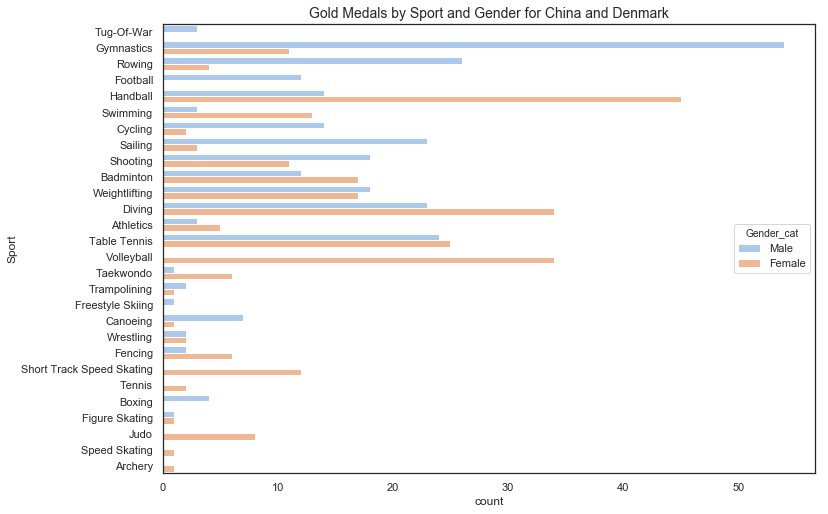

In [12]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['NOC'] == 'CHN') | (df['NOC'] == 'DEN')) & (df['Medal'] == 'Gold'),
    ['Sport','Gender']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Gender_cat'] = None
df_2cat.loc[df_2cat['Gender'] == 1, 'Gender_cat'] = 'Male'
df_2cat.loc[df_2cat['Gender'] == 0, 'Gender_cat'] = 'Female'

# Plot counts for each combination of levels.

sns.countplot(y="Sport", hue="Gender_cat", data=df_2cat, palette="pastel")
plt.title('Gold Medals by Sport and Gender for China and Denmark', fontsize=14);
plt.show()

### Changing Variable Types - Creating New Features

In [13]:
print(df.NOC.unique())

['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB' 'I

In [14]:
# Creating a data frame to hold our features.
features = pd.get_dummies(df['NOC'])

# 1. East Asia countries dummy.
features['East Asia'] = np.where((df['NOC'].isin(['CHN', 'KOR', 'JPN', 'PHI', 'HKG', 'MGL', 'PRK', 'TPE', 'MAS'])), 1, 0)

# 2. South America countries dummy 
features['South America'] = np.where((df['NOC'].isin(['ARG', 'ECU', 'SUR', 'BOL', 'BRA', 'GUY', 'URU', 'CHI', 'COL',
                                                 'PAR', 'PER', 'VEN'])), 1,0)

# 3. Western European countries dummy
features['West Europe'] = np.where((df['NOC'].isin(['FRA', 'ENG', 'ESP', 'POR', 'ITA', 'MON', 'SUI', 'GER',
                                                   'BUL', 'GRE'])), 1, 0)

# 4. Eastern European countries dummy
features['Eastern Europe'] = np.where((df['NOC'].isin(['ROU', 'EST', 'AZE', 'RUS', 'BLR'])), 1, 0)

# 5. African countries
features['Africa'] = np.where((df['NOC'].isin(['CMR', 'GHA'])), 1, 0)

# 6. North African countries
features['North Africa'] = np.where((df['NOC'].isin(['MAR', 'EGY', 'IRI', 'CHA', 'SUD', 'UAR', 'LIB', 'QAT'])), 1, 0)

# 7. North American countries
features['North America'] = np.where((df['NOC'].isin(['USA', 'CAD', 'MEX'])), 1, 0)

# 8. Nordic Countries
features['Nordic'] = np.where((df['NOC'].isin(['DEN', 'NED', 'FIN', 'NOR'])), 1, 0)

# 9. Age under 25
features['Under 25'] = np.where(df['Age']>=25, 1, 0)

#10. Age between 25 and 50
features['Middle Age'] = np.where((df['Age']>25) & (df['Age'] <=50), 1, 0)

# 11. Got a Medal
features['Placed'] = np.where((df['Medal'].isin(['Gold', 'Silver', 'Bronze'])), 1, 0)

# 12. Female
features['Female'] = np.where((df['Sex'].isin(['F'])), 1,0 )

# 13. BMI combines the 'height' and 'weight' feature into the BMI relationship

features['BMI'] = df['Weight'] / (df['Height_M'] ** 2)
df['BMI'] = features['BMI']

# 14. Looking only at the sport Swimming

features['Swimming'] = np.where((df['Sport'].isin(['Swimming'])), 1,0)

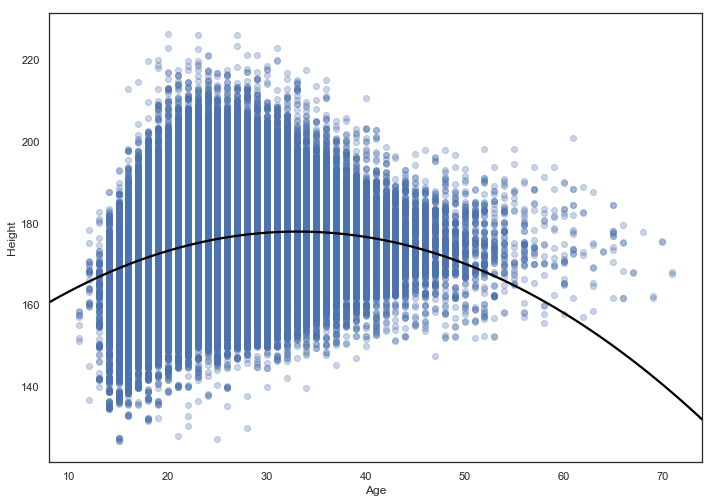

In [15]:
sns.regplot(
    df['Age'],
    y=df['Height'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None,
)
plt.show()

features['age_squared'] = df['Age'] * df['Age']

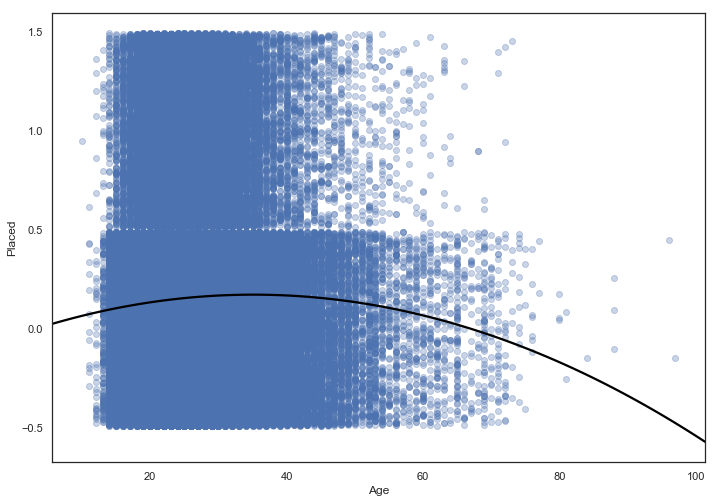

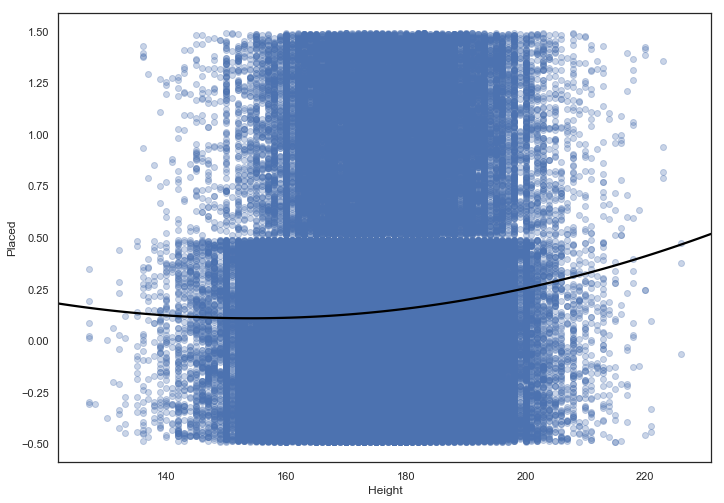

In [16]:
sns.regplot(
    df['Age'],
    y=features['Placed'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

sns.regplot(
    df['Height'],
    y=features['Placed'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

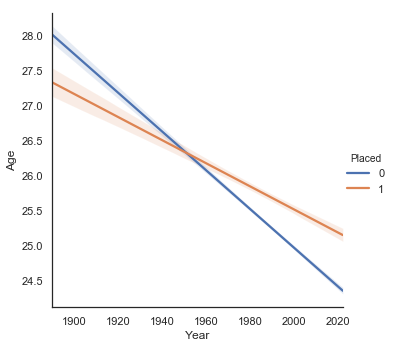

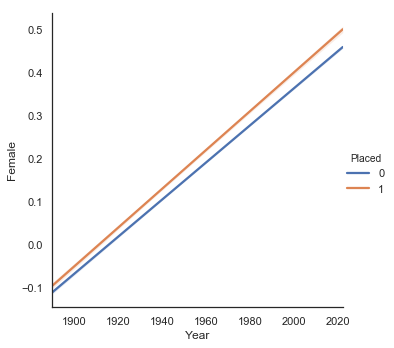

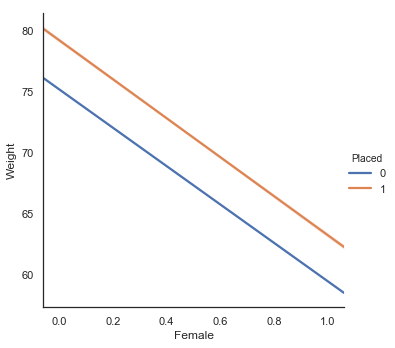

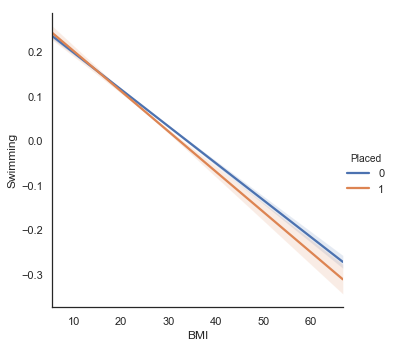

In [17]:
# Create the interaction.
features['Female Height'] = df['Height'] * features['Female']
features['Age'] = df['Age']
features['Year'] = df['Year']
features['Weight'] = df['Weight']

# A plot of an interaction.
sns.lmplot(
    x='Year',
    y='Age',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

# A plot of an interaction.
sns.lmplot(
    x='Year',
    y='Female',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

# A plot of an interaction.
sns.lmplot(
    x='Female',
    y='Weight',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()


# A plot of an interaction.
sns.lmplot(
    x='BMI',
    y='Swimming',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

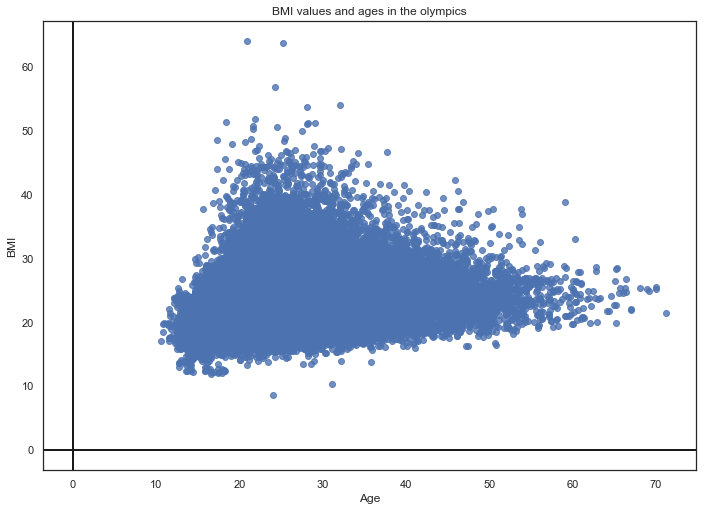

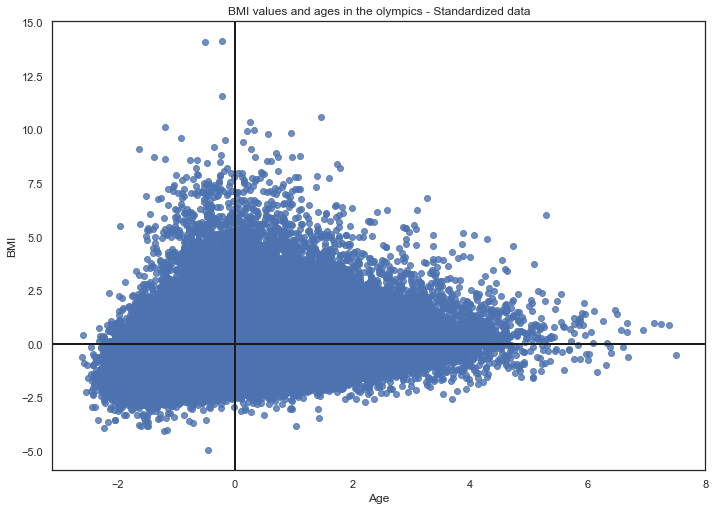

In [18]:
t = sns.regplot(
    'Age',
    'BMI',
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('BMI values and ages in the olympics')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
features['Age'] = (features['Age'] - features['Age'].mean()) / features['Age'].std()
features['BMI'] = (features['BMI'] - features['BMI'].mean()) / features['BMI'].std()

t = sns.regplot(
    'Age',
    'BMI',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('BMI values and ages in the olympics - Standardized data')
plt.show()

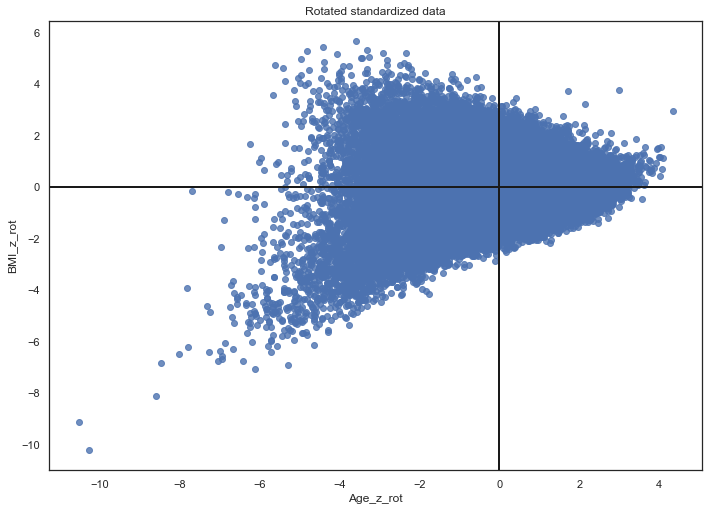

In [19]:
# Rotating the data so that the axes roughly match to vector above.
features['Age_z_rot'] = math.cos(40) * features['Age'] - math.sin(40) * features['BMI']
features['BMI_z_rot'] = math.sin(40) * features['Age'] + math.cos(40) * features['BMI']

t = sns.regplot(
    'Age_z_rot',
    'BMI_z_rot',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

### Conclusion